## Introduction
<details>
<summary>Fashion Apparel Classification project overview (Click me)</summary>



**Students**:
- Youssef ELMOUMEN,     FVW745
- Doha Djellit,     VFOAXE
- Thabet Asmaa A. H. Naima,     ZWGD9E
- Abed Al Hadi Ali, YTUK16

**Title:** Fashion Apparel Classification using the Fashion MNIST Dataset

**Objective:** The primary goal is to utilize deep learning techniques to train a Convolutional Neural Network (CNN) that accurately classifies different types of apparel from the Fashion MNIST dataset.

**Background:**
- The Fashion MNIST dataset by Zalando Research contains 70,000 grayscale images of 10 fashion categories, each of size 28x28 pixels. It serves as an advanced benchmark for machine learning algorithms.
- Automated classification is essential for inventory management, trend analysis, and enhancing the customer shopping experience, especially with the dynamic nature of fashion trends.

**Tasks:**

1. **Data Loading:**
   - Load the complete Fashion MNIST dataset into a Python environment for subsequent processing and model training.

2. **Data Visualization & Exploration:**
   - Visualize various apparel classes to understand category distribution and individual class image characteristics.

3. **Data Preprocessing & Image Augmentation:**
   - Perform normalization of image pixel values and encode categorical class labels.
   - Augment the dataset to enhance model generalizability through techniques like rotation, translation, and flipping.

4. **CNN Model Development:**
   - Design a CNN architecture tailored for the classification task.
   - Experiment with layers, activation functions, and hyperparameters to refine the model.

5. **Model Training and Testing:**
   - Train the CNN with the training set and validate its performance using the test set.
   - Implement callbacks and checkpoints for efficient training.

6. **Performance Evaluation:**
   - Use metrics such as accuracy and loss to evaluate model performance.
   - Create confusion matrices and classification reports to understand model behavior across all categories.

7. **Result Visualization:**
   - Plot accuracy and loss curves to visualize training history.
   - Display correctly and incorrectly classified images to provide qualitative insights into model performance.

**End Goal:**
- Develop a robust CNN model that classifies fashion apparel with high accuracy.
- Contribute insights to computer vision and fashion retail sectors by addressing real-world problems through technology.

**Dataset Availability:**
- The dataset is available on Kaggle: [Fashion MNIST Dataset](https://www.kaggle.com/datasets/zalando-research/fashionmnist)
- Source repository on GitHub: [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)


**Labels**<br>
Each training and test example is assigned to one of the following labels:
- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot
</details>


In [1]:
import json
import zipfile
import os
data_dir = os.path.expanduser('~') + '/data'
data_set='zalando-research/fashionmnist'

# YOU HAVE TO REFRESH THE DIRECTORY TO SEE THE DATA
def download_kaggle_data_set(dataset_name):
    !rm -rf sample_data
    !pip3 install kaggle  --break-system-packages > /dev/null
    kaggle_json={"username":"youssefelmoumen","key":"9e38b743dc216e501da2cdc7e2f080ce"}
    !rm -r ~/.kaggle
    !mkdir ~/.kaggle
    user_dir = os.path.expanduser('~')
    print(user_dir)
    with open(user_dir + '/.kaggle/kaggle.json', 'w') as file:
        json.dump(kaggle_json, file)

    !chmod 600 ~/.kaggle/kaggle.json
    !kaggle datasets download -d $dataset_name
    !rm -r data
    !mkdir data
    with zipfile.ZipFile('fashionmnist.zip', 'r') as zip_ref:
        zip_ref.extractall('data')
    !rm fashionmnist.zip




In [ ]:
#Download the data
fashion_dataset =download_kaggle_data_set(data_set)


### Data Loading

In [3]:
test_data_file= 'data/fashion-mnist_test.csv'
train_data_file='data/fashion-mnist_train.csv'
labels ="D:data/t10k-labels-idx1-ubyte"

import pandas as pd
import numpy as np

# Train data
train_data = pd.read_csv(train_data_file)
#print(f'The number of NaN values in train data is {train_data.isna().sum().sum()}') #Prints the number of NaN values
train_data.head()
train_data.shape
train_data.describe()
train_data['label'].value_counts()
train_data.info()

# Test data
test_data = pd.read_csv(test_data_file)
#print(f'The number of NaN values in test data is {test_data.isna().sum().sum()}')
test_data.head()
test_data.shape
print(test_data.describe())
print(test_data['label'].value_counts())
print(test_data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
              label        pixel1        pixel2        pixel3        pixel4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       4.500000      0.000400      0.010300      0.052100      0.077000   
std        2.872425      0.024493      0.525187      2.494315      2.208882   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000      0.000000      0.000000      0.000000      0.000000   
50%        4.500000      0.000000      0.000000      0.000000      0.000000   
75%        7.000000      0.000000      0.000000      0.000000      0.000000   
max        9.000000      2.000000     45.000000    218.000000    185.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  10000.000000  10000.000000  10000.000000  10

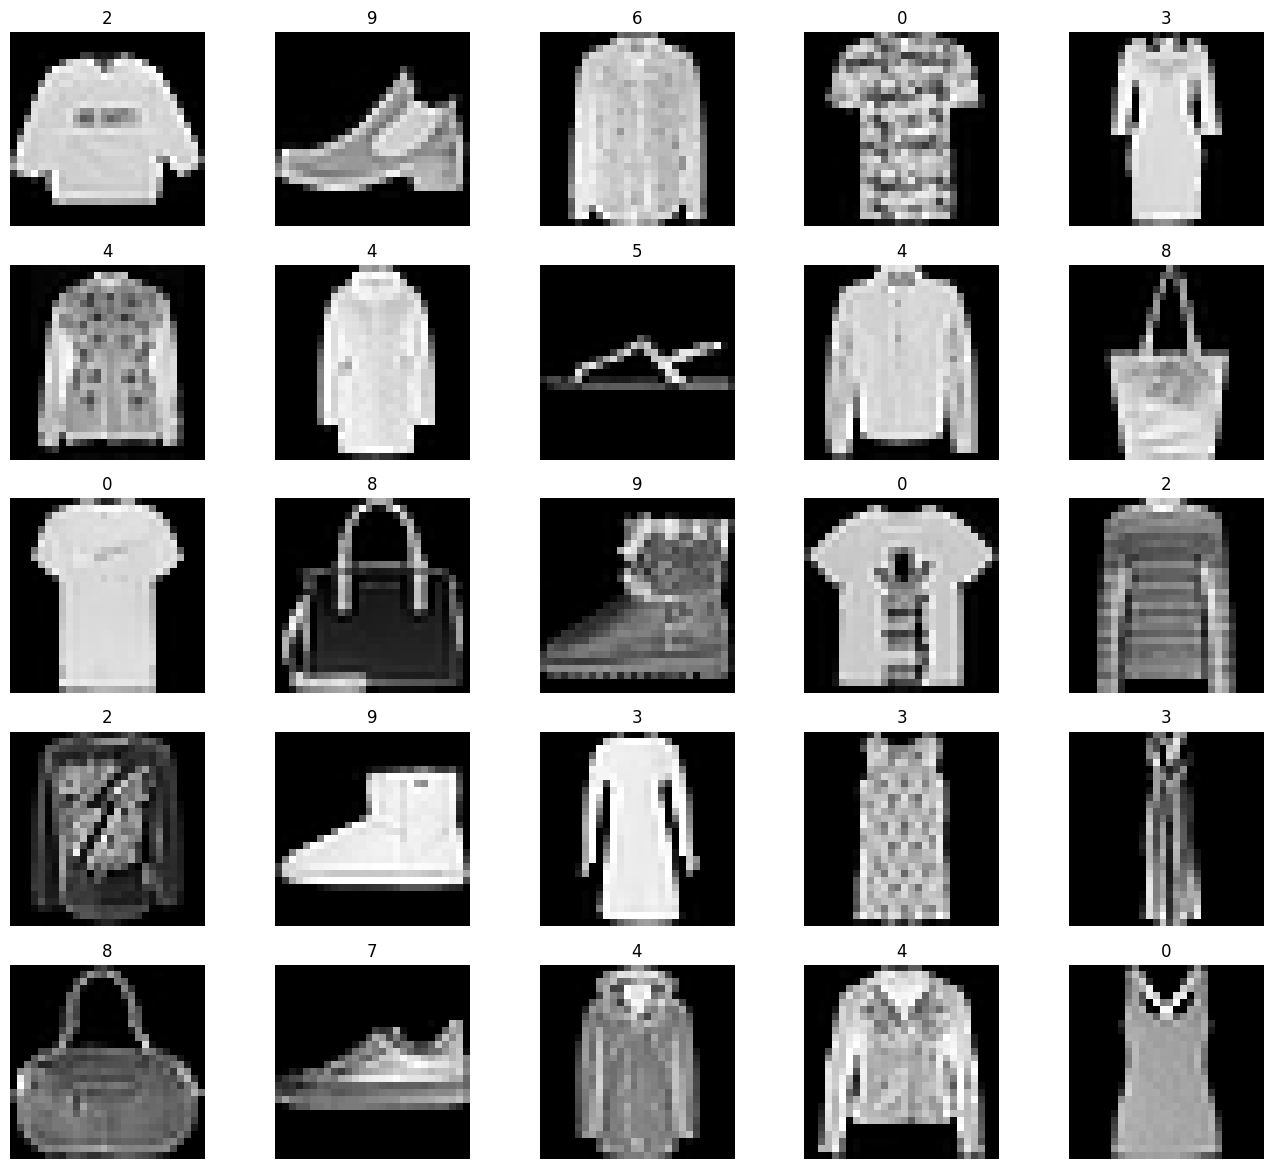

In [4]:
#!pip3 install matplotlib > /dev/null
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()


def show_images(data, indexes, labels=None, columns=5):

    rows = len(indexes) // columns + 1
    fig = plt.figure(figsize=(20, 20))

    for i, index in enumerate(indexes):
        image = data.iloc[index, 1:].values
        image = image.reshape((28, 28))
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(data.iloc[index, 0])
        ax.axis('off')
        ax.imshow(image, cmap='gray')

    # Adjust the subplot parameters to give the specified margin
    plt.subplots_adjust(left=0.16, right=0.80, top=0.84, bottom=0.16)

    plt.show()


show_images(train_data, range(0, 25))


## Training with CNN tensorflow

In [12]:
#####CNN Model######

In [5]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_file='data/fashion-mnist_train.csv'
test_data_file='data/fashion-mnist_test.csv'
# Load datasets
train_data = pd.read_csv(train_data_file)
test_data = pd.read_csv(test_data_file)

# Extract labels and convert them to numpy arrays
y_train = train_data['label'].values
y_test = test_data['label'].values

# Drop the label column to isolate the image data
X_train = train_data.drop(columns=['label']).values
X_test = test_data.drop(columns=['label']).values

# Reshape the data to fit the model input requirements (28x28 pixels, 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Define the CNN model architecture
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Checkpoint and Early Stopping

checkpoint_filepath = './checkpoints/checkpoint.weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit the model with the checkpoint and early stopping callback
# model.fit(datagen.flow(X_train, y_train, batch_size=32),
#           epochs=20,
#           validation_data=(X_test, y_test),
#           callbacks=[model_checkpoint_callback, early_stopping])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[model_checkpoint_callback, early_stopping])

# Load the best weights (if necessary)
model.load_weights(checkpoint_filepath)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}, loss: {test_loss:.3f}')

C:\Users\why_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7695 - loss: 1.5897
Epoch 1: val_loss improved from inf to 0.47530, saving model to ./checkpoints/checkpoint.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7696 - loss: 1.5894 - val_accuracy: 0.8561 - val_loss: 0.4753
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8683 - loss: 0.4504
Epoch 2: val_loss did not improve from 0.47530
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 61s 32ms/step - accuracy: 0.8683 - loss: 0.4504 - val_accuracy: 0.8113 - val_loss: 0.6853
Epoch 3/10
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8843 - loss: 0.4047
Epoch 3: val_loss improved from 0.47530 to 0.41853, saving model to ./checkpoints/checkpoint.weights.h5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 34ms/step - accuracy: 0.8843 - loss: 0.4047 - val_accuracy: 0.8718 - val_loss: 0.4185
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8969 - loss: 0.3689
Epoch 4: val_loss improved fro

In [6]:
!pip3 install scikit-learn > /dev/null
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)

The system cannot find the path specified.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.81      0.84      1000
           3       0.93      0.90      0.91      1000
           4       0.76      0.90      0.82      1000
           5       0.96      0.99      0.97      1000
           6       0.77      0.61      0.68      1000
           7       0.95      0.95      0.95      1000
           8       0.99      0.96      0.98      1000
           9       0.96      0.94      0.95      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



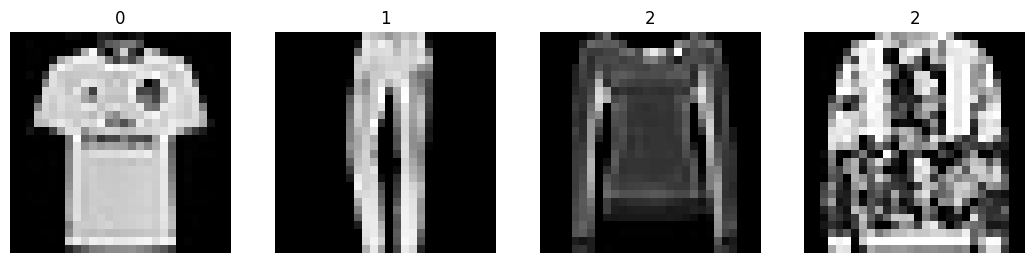

In [21]:
##Display Original test Images 

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.show()

def show_images(data, indexes, labels=None, columns=5):

    rows = len(indexes) // columns + 1
    fig = plt.figure(figsize=(20, 20))

    for i, index in enumerate(indexes):
        image = data.iloc[index, 1:].values
        image = image.reshape((28, 28))
        ax = fig.add_subplot(rows, columns, i + 1)
        ax.set_title(data.iloc[index, 0])
        ax.axis('off')
        ax.imshow(image, cmap='gray')
    plt.subplots_adjust(left=0.16, right=0.80, top=0.84, bottom=0.16)

    plt.show()


show_images(test_data, range(0, 4))






In [ ]:
#Testing the CNN Model and Viewing the prediction results

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


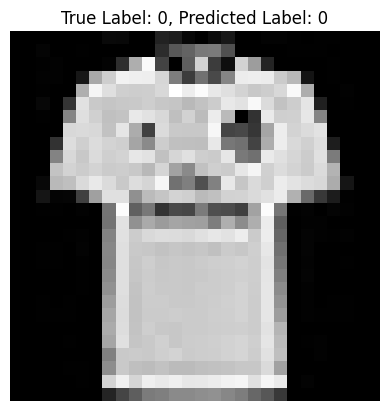

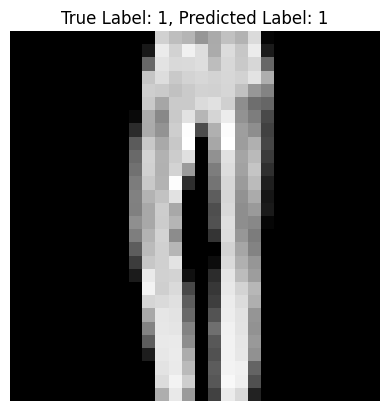

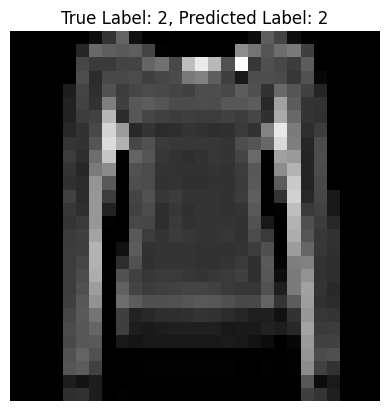

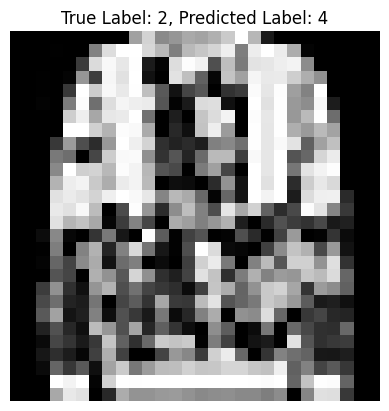

In [19]:



y_pred = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)


# Define a function to display image and prediction
def display_image_with_prediction(image, true_label, predicted_label):


    # Display the image
    plt.imshow(image.reshape((28, 28)), cmap='gray')
    plt.axis('off')
    plt.title(f'True Label: {true_label}, Predicted Label: {predicted_label}')
    plt.show()

# Loop through the first 5 samples of test data
for i in range(4):
    # Get the image, true label, and predicted label
    image = X_test[i]
    true_label = y_test_classes[i]
    predicted_label = y_pred_classes[i]
    
    # Display the image with its true and predicted labels
    display_image_with_prediction(image, true_label, predicted_label)





The system cannot find the path specified.


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


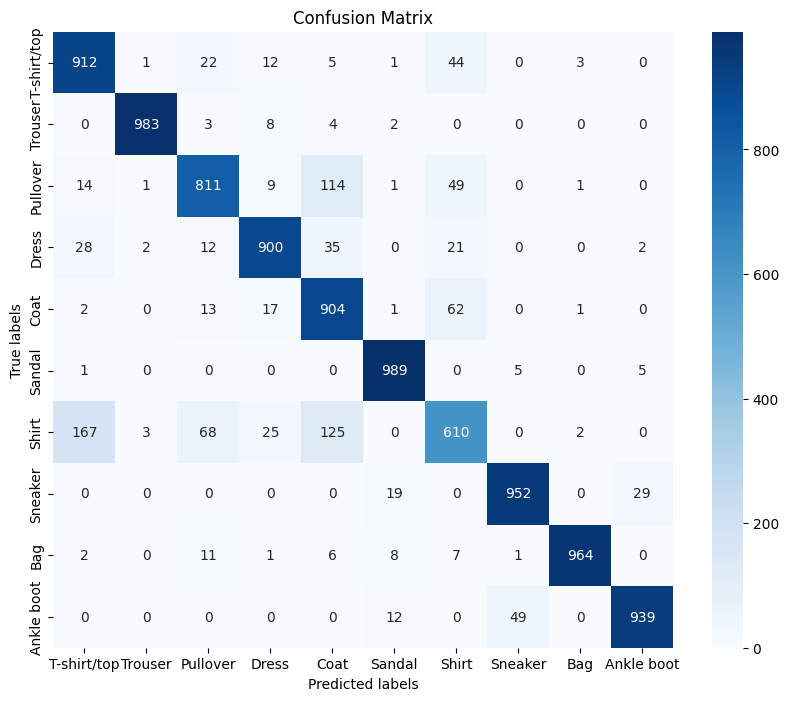

In [8]:
!pip3 install seaborn > /dev/null
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have already trained your Logistic Regression model and have X_test and y_test ready

# Make predictions on the test data
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Generate and print the classification report
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d",xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


## Visualizations

In [25]:
import pandas as pd

train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

# Check for missing values
print(train_df.info())
print(test_df.info())

# Assuming the first column is the label and the rest are features
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None


### Describe FashionMNIST dataset

In [34]:
import tensorflow as tf
import ssl


train_images='data/train-images-idx3-ubyte'
train_labels = 'data/train-labels-idx1-ubyte'
test_images="data/t10k-images-idx3-ubyte"
test_labels="data/t10k-labels-idx1-ubyte"

# load them 
with open(train_images, 'rb') as f:
    train_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with open(train_labels, 'rb') as f:
    train_labels = np.frombuffer(f.read(), np.uint8, offset=8)
with open(test_images, 'rb') as f:
    test_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
with open(test_labels, 'rb') as f:
    test_labels = np.frombuffer(f.read(), np.uint8, offset=8)

print("Test set:")
print(f"Number of samples: {test_images.shape[0]}")
print(f"Image shape: {test_images.shape[1:]}")
print(f"Data type: {test_images.dtype}")
print(f"Minimum pixel value: {test_images.min()}")
print(f"Maximum pixel value: {test_images.max()}")
print("--------------------------------")
print("Labels:")
print("Class Labels: 0 - T-shirt/top, 1 - Trouser, 2 - Pullover, 3 - Dress, 4 - Coat, 5 - Sandal, 6 - Shirt, 7 - Sneaker, 8 - Bag, 9 - Ankle boot")
print(f"Number of unique labels: {len(set(train_labels))}")
print(f"Labels distribution in training set: {[(i, list(train_labels).count(i)) for i in set(train_labels)]}")
print("--------------------------------")

print("Instances, Features & Categories:")
# Get the number of instances (samples) and features
num_train_instances, height, width = train_images.shape
num_test_instances, _, _ = test_images.shape
num_features = height * width

# Display the number of instances and features
print("Number of instances (samples) in the training set:", num_train_instances)
print("Number of instances (samples) in the testing set:", num_test_instances)
print("Number of features (pixels) per instance:", num_features)

# Find number of categories (classes)
num_categories = len(set(train_labels))

print("Number of categories (classes) in FashionMNIST dataset:", num_categories)


Test set:
Number of samples: 10000
Image shape: (28, 28)
Data type: uint8
Minimum pixel value: 0
Maximum pixel value: 255
--------------------------------
Labels:
Class Labels: 0 - T-shirt/top, 1 - Trouser, 2 - Pullover, 3 - Dress, 4 - Coat, 5 - Sandal, 6 - Shirt, 7 - Sneaker, 8 - Bag, 9 - Ankle boot
Number of unique labels: 10
Labels distribution in training set: [(0, 6000), (1, 6000), (2, 6000), (3, 6000), (4, 6000), (5, 6000), (6, 6000), (7, 6000), (8, 6000), (9, 6000)]
--------------------------------
Instances, Features & Categories:
Number of instances (samples) in the training set: 60000
Number of instances (samples) in the testing set: 10000
Number of features (pixels) per instance: 784
Number of categories (classes) in FashionMNIST dataset: 10


This code will create two DataFrames (train_df and test_df) containing the flattened images and their corresponding labels for the training and testing sets, respectively. Each row in the DataFrame represents an instance (image) with its pixel values as features and the label as the target.

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Flatten the image arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Create DataFrame for training set
train_df = pd.DataFrame(data=np.c_[train_images_flat, train_labels],
                        columns=[f"pixel_{i}" for i in range(train_images_flat.shape[1])] + ['label'])

# Create DataFrame for testing set
test_df = pd.DataFrame(data=np.c_[test_images_flat, test_labels],
                       columns=[f"pixel_{i}" for i in range(test_images_flat.shape[1])] + ['label'])

# Display the DataFrames
print("Training set:")
print(train_df.head())
print("\nTesting set:")
print(test_df.head())


Training set:
   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        1        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        0  ...          0          0          0          0   
1        0        0  ...        114        130         76          0   
2        0       22  ...          0          1          0          0   
3       33       96  ...          0          0          0          0   
4        0        0  ...          0          0          0          0   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0          0          0 

This code will split the FashionMNIST test dataset into training and testing sets using train_test_split, and then create a DataFrame (dfTest) for the testing set, containing the flattened images and their corresponding labels. Each row in the DataFrame represents an instance (image) with its pixel values as features and the label as the target.

In [38]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Flatten the image arrays
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(test_images_flat, test_labels, test_size=0.25, random_state=42)

# Create DataFrame for testing set
dfTest = pd.DataFrame(data=np.c_[xTest, yTest],
                      columns=[f"pixel_{i}" for i in range(xTest.shape[1])] + ['label'])

# Display the test DataFrame
print(dfTest.head())


   pixel_0  pixel_1  pixel_2  pixel_3  pixel_4  pixel_5  pixel_6  pixel_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel_8  pixel_9  ...  pixel_775  pixel_776  pixel_777  pixel_778  \
0        0        1  ...          0          0          0          0   
1        0        0  ...          0          0          0          0   
2        0       39  ...          8          0          0          0   
3        0        0  ...          0          2          0          9   
4        0        4  ...         25         14          0        148   

   pixel_779  pixel_780  pixel_781  pixel_782  pixel_783  label  
0          0          0          0    

##  SVM Classifier Metrics and Model

In [39]:

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , balanced_accuracy_score, f1_score, log_loss
import numpy as np
import pandas as pd


train_df = pd.read_csv('data/fashion-mnist_train.csv')
test_df = pd.read_csv('data/fashion-mnist_test.csv')

# Check for missing values
print(train_df.info())
print(test_df.info())

# Assuming the first column is the label and the rest are features
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values


classifier = SVC(probability=True)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
loss = log_loss(y_test, y_prob)

# Print evaluation metrics
print("Evaluation Metrics for SVC Classifier:")
print("--------------------------------------")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
print("Log Loss:", loss)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB
None
Evaluation Metrics for SVC Classifier:
--------------------------------------
Accuracy: 0.8921
Balanced Accuracy: 0.8920999999999999
F1 Score: 0.8915003945780919
Log Loss: 0.29818199856446


In [40]:
# Import classification_report from scikit-learn
from sklearn.metrics import classification_report

# Generate and print the classification report
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.86      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.84      0.82      0.83      1000
       Dress       0.89      0.92      0.90      1000
        Coat       0.84      0.87      0.85      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.74      0.68      0.71      1000
     Sneaker       0.92      0.94      0.93      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [41]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
loss = log_loss(y_test, y_prob)

# Print evaluation metrics
print("Evaluation Metrics for SVC Classifier:")
print("--------------------------------------")
print("Accuracy:", accuracy)
print("Balanced Accuracy:", balanced_accuracy)
print("F1 Score:", f1)
print("Log Loss:", loss)


Evaluation Metrics for SVC Classifier:
--------------------------------------
Accuracy: 0.8921
Balanced Accuracy: 0.8920999999999999
F1 Score: 0.8915003945780919
Log Loss: 0.29818199856446


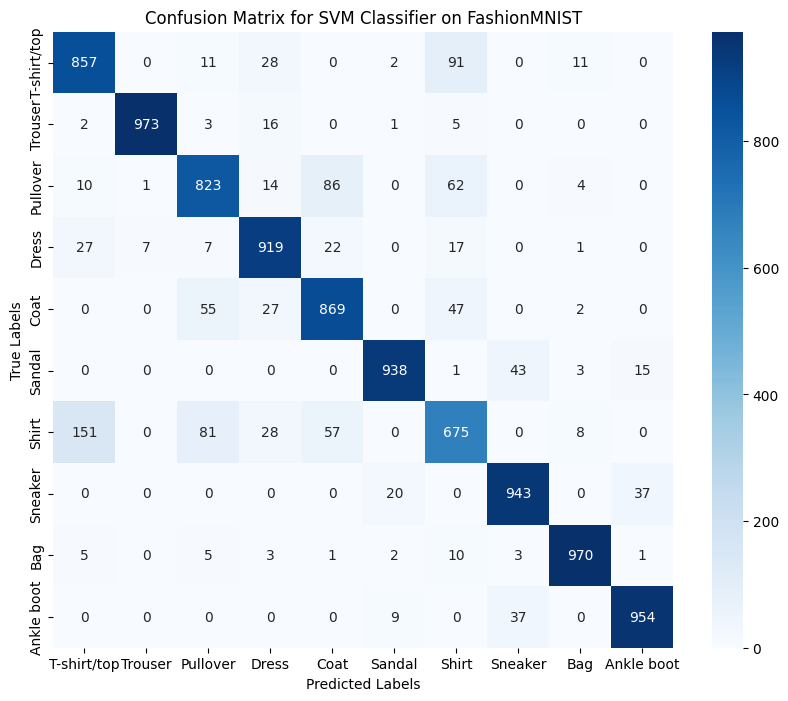

In [42]:
# Import required libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Classifier on FashionMNIST')
plt.show()


## KNeighborsClassifier
 is a machine learning model implemented in the Python library scikit-learn. It is used for classification tasks and is based on the k-Nearest Neighbors (k-NN) algorithm.

In [43]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

# Initialize the k-NN classifier (specify n_neighbors as needed)
knn = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
knnPred = knn.predict(X_test)
knnProb= knn.predict_proba(X_test)


# Print the classification report to evaluate performance
print(classification_report(y_test, knnPred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.77      0.87      0.82      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.75      0.81      0.78      1000
       Dress       0.91      0.88      0.90      1000
        Coat       0.79      0.80      0.79      1000
      Sandal       1.00      0.82      0.90      1000
       Shirt       0.68      0.58      0.63      1000
     Sneaker       0.87      0.94      0.91      1000
         Bag       0.98      0.95      0.97      1000
  Ankle boot       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [44]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, log_loss

# Print evaluation metrics
print("Evaluation Metrics for KNeighbors Classifier:")
print("--------------------------------------")
print("Accuracy:", accuracy_score(y_test, knnPred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, knnPred))
print("F1 Score:", f1_score(y_test, knnPred, average='weighted'))
print("Log Loss:", log_loss(y_test, knnProb))

Evaluation Metrics for KNeighbors Classifier:
--------------------------------------
Accuracy: 0.8589
Balanced Accuracy: 0.8589
F1 Score: 0.8580386825779729
Log Loss: 1.749503487525264


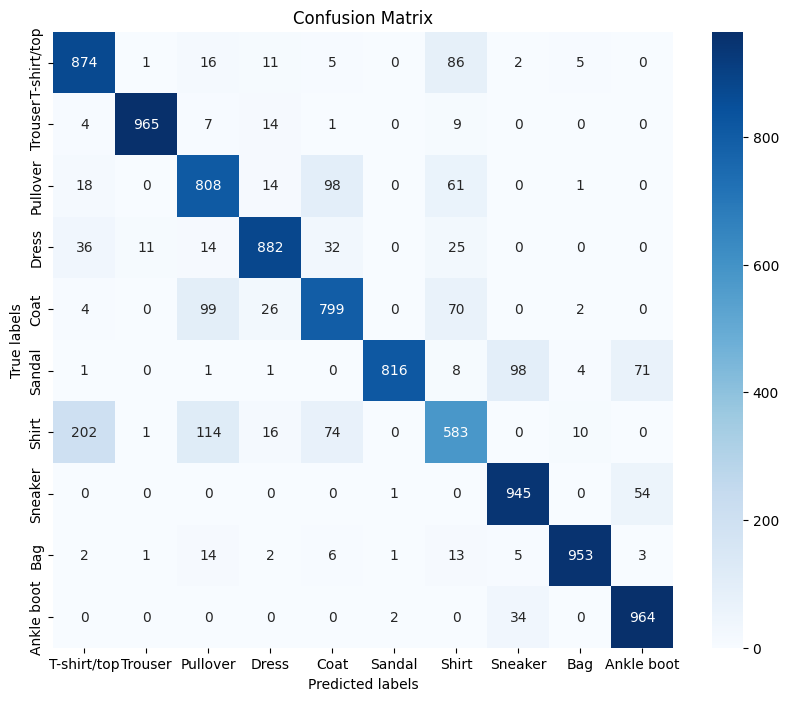

In [45]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, knn.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



## Gaussian Naive Bayes Classifier




In [46]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
gnbPred = gnb.predict(X_test)
gnbProb = gnb.predict_proba(X_test)


# Generate and print the classification report, specifying the target names
print(classification_report(y_test, gnbPred, target_names=class_names))


              precision    recall  f1-score   support

 T-shirt/top       0.83      0.59      0.69      1000
     Trouser       0.69      0.94      0.79      1000
    Pullover       0.61      0.32      0.42      1000
       Dress       0.46      0.64      0.53      1000
        Coat       0.38      0.77      0.51      1000
      Sandal       0.89      0.29      0.44      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.50      0.98      0.66      1000
         Bag       0.83      0.71      0.77      1000
  Ankle boot       0.92      0.63      0.75      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



In [47]:
print("Evaluation Metrics for Gaussian Naive Bayes Classifier:")
print("--------------------------------------")
print("Accuracy:", accuracy_score(y_test, gnbPred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, gnbPred))
print("F1 Score:", f1_score(y_test, gnbPred, average='weighted'))
print("Log Loss:", log_loss(y_test, gnbProb))


Evaluation Metrics for Gaussian Naive Bayes Classifier:
--------------------------------------
Accuracy: 0.5914
Balanced Accuracy: 0.5914
F1 Score: 0.5627387972343205
Log Loss: 14.219901360032864


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2981: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


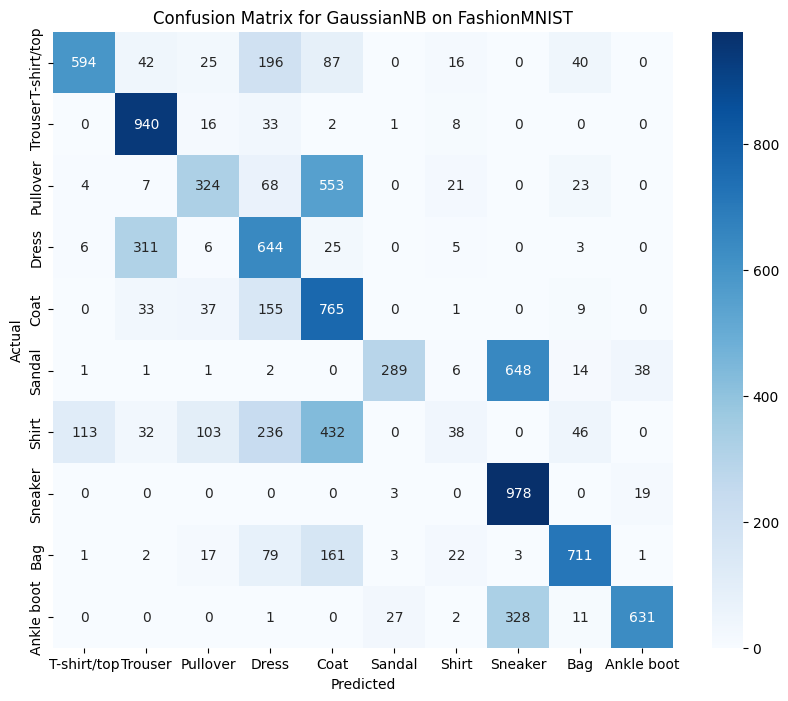

In [48]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create the confusion matrix
cm = confusion_matrix(y_test, gnbPred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for GaussianNB on FashionMNIST')
plt.show()


## Logistic Regression

In [49]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml


# Initialize the Logistic Regression model
lr = LogisticRegression(max_iter=100, solver='lbfgs', multi_class='multinomial')

# Train the model on the training data
lr.fit(X_train, y_train)

# Predict on the test data
lrPred = lr.predict(X_test)

# If you need probabilities
lrProb = lr.predict_proba(X_test)


# Print the classification report
print(classification_report(y_test, lrPred, target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.81      1000
     Trouser       0.95      0.98      0.96      1000
    Pullover       0.77      0.76      0.77      1000
       Dress       0.88      0.87      0.87      1000
        Coat       0.75      0.82      0.79      1000
      Sandal       0.95      0.88      0.91      1000
       Shirt       0.68      0.58      0.63      1000
     Sneaker       0.90      0.93      0.92      1000
         Bag       0.93      0.95      0.94      1000
  Ankle boot       0.92      0.95      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# Import necessary functions from scikit-learn
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, log_loss

# Obtain predictions and predicted probabilities
lrPred = lr.predict(X_test)
lrProb = lr.predict_proba(X_test)

# Calculate evaluation metrics
accuracy= accuracy_score(y_test, lrPred)
balance_accuracy = balanced_accuracy_score(y_test, lrPred)
f1 = f1_score(y_test, lrPred, average='weighted')
loss = log_loss(y_test, lrProb)

# Print evaluation metrics
print("Evaluation Metrics for Logistic Regression Classifier:")
print("--------------------------------------")
print("Accuracy:", accuracy )
print("Balanced Accuracy: ", balance_accuracy)
print("F1 Score: ", f1)
print("Log Loss: ", loss)


Evaluation Metrics for Logistic Regression Classifier:
--------------------------------------
Accuracy: 0.8544
Balanced Accuracy:  0.8544
F1 Score:  0.8529011356168574
Log Loss:  0.44334444146632257


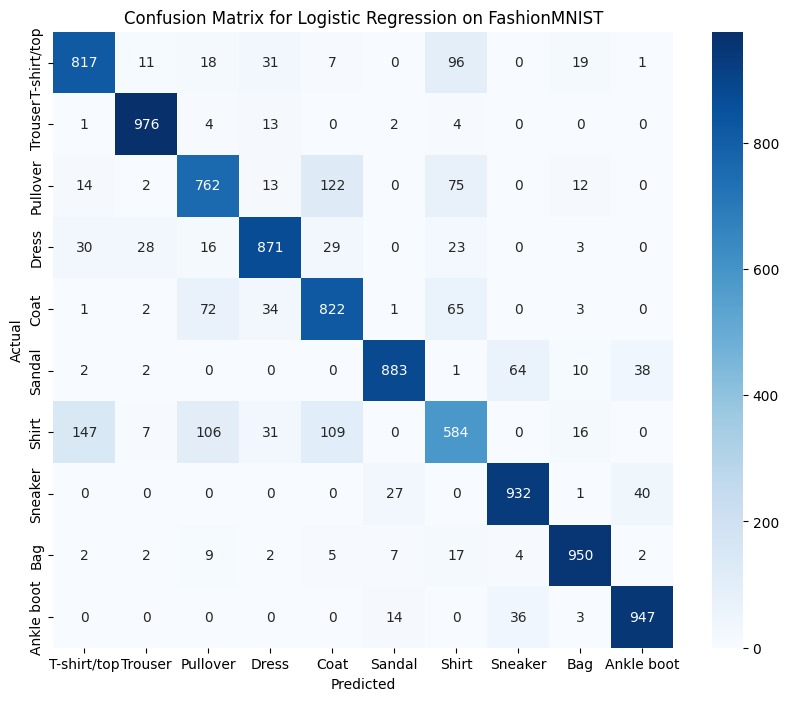

In [51]:
# Import necessary libraries for confusion matrix visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix using the logistic regression predictions
cm = confusion_matrix(y_test, lrPred)

# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression on FashionMNIST')
plt.show()


## Cross Validation

In [83]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

import tensorflow as tf
import ssl


#data loaded to vars: train_images ,train_labels ,test_images ,test_labels


# Function to create the CNN model
def create_model():
    model = Sequential([
        Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(256, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Load the data
X_train = train_images.reshape(-1, 28, 28, 1)
X_test = test_images.reshape(-1, 28, 28, 1)
y_train = to_categorical(train_labels, 10)
y_test = to_categorical(test_labels, 10)

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store the results
acc_per_fold = []
loss_per_fold = []

# Loop through the folds
for train_index, val_index in skf.split(X_train, train_labels):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Create the model
    model = create_model()

    # Fit the model
    model.fit(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold), verbose=0)

    # Evaluate the model
    scores = model.evaluate(X_test, y_test, verbose=0)

    # Append the scores to the lists
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])



# Provide average scores
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(len(acc_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold):.2f} (+- {np.std(acc_per_fold):.2f})')
print(f'> Loss: {np.mean(loss_per_fold):.2f}')
print('------------------------------------------------------------------------')


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.4180976450443268 - Accuracy: 88.99999856948853%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.41137993335723877 - Accuracy: 88.88000249862671%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.5078486800193787 - Accuracy: 86.83000206947327%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.45873013138771057 - Accuracy: 88.30000162124634%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.44572535157203674 - Accuracy: 88.26000094413757%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 88.25 (+- 0.77)
> Loss: 0.45
-----------------------------------------------------------------

In [ ]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Define the number of cross-validation folds
# standard because they provide a good trade-off between bias and variance in evaluation.
cv_folds = 5

# Evaluate K-Nearest Neighbors using cross-validation
knn_scores = cross_val_score(knn, X_train, y_train, cv=cv_folds)
print("K Nearest Neighbors Cross-Validation Accuracy: ", knn_scores)
print("KNN Mean Accuracy: ", knn_scores.mean())


K Nearest Neighbors Cross-Validation Accuracy:  [0.855      0.85541667 0.85325    0.85241667 0.85391667]
KNN Mean Accuracy:  0.8539999999999999


In [ ]:
# Evaluate Gaussian Naive Bayes using cross-validation
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=cv_folds)
print("Gaussian Naive Bayes Cross-Validation Accuracy: ", gnb_scores)
print("GNB Mean Accuracy: ", gnb_scores.mean())


Gaussian Naive Bayes Cross-Validation Accuracy:  [0.59783333 0.57675    0.60958333 0.59758333 0.58616667]
GNB Mean Accuracy:  0.5935833333333334


In [ ]:
# Evaluate Logistic Regression using cross-validation
lr_scores = cross_val_score(lr, X_train, y_train, cv=cv_folds)
print("Logistic Regression Cross-Validation Accuracy: ", lr_scores)
print("Logistic Regression Mean Accuracy: ", lr_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-Validation Accuracy:  [0.84991667 0.84866667 0.85533333 0.85016667 0.8505    ]
Logistic Regression Mean Accuracy:  0.8509166666666668


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
